In [4]:
!pip install torch torchvision torchaudio

In [7]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 21695, done.
remote: Counting objects: 100% (947/947), done.
remote: Compressing objects: 100% (526/526), done.
remote: Total 21695 (delta 624), reused 618 (delta 420), pack-reused 20748
Receiving objects: 100% (21695/21695), 11.59 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (15285/15285), done.


In [8]:
!cd yolov5

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [11]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO

In [3]:
#model = torch.hub.load('ultralytics/ultralytics', 'yolov5s')
model = YOLO("yolov8n.pt")

Using cache found in /Users/vicki/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-28 Python-3.11.5 torch-2.1.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## 3. Image Object Detection

In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1247.8ms pre-process, 198.1ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


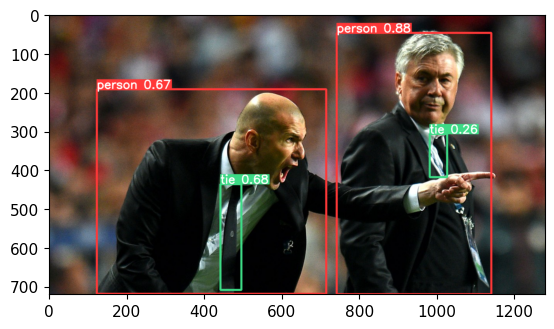

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.xyxy

[tensor([[7.42975e+02, 4.83955e+01, 1.14184e+03, 7.20000e+02, 8.81053e-01, 0.00000e+00],
         [4.42008e+02, 4.37522e+02, 4.96654e+02, 7.09974e+02, 6.75214e-01, 2.70000e+01],
         [1.23024e+02, 1.93287e+02, 7.15662e+02, 7.19724e+02, 6.65812e-01, 0.00000e+00],
         [9.82803e+02, 3.08417e+02, 1.02737e+03, 4.19987e+02, 2.60076e-01, 2.70000e+01]])]

## 4. Real-Time Object Detection

In [3]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 5. Training from Scratch

In [5]:
import uuid
import os
import time

In [6]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['attentive', 'drowsy', 'looking away']
number_imgs = 33

In [7]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(1,number_imgs+1):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [7]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 17.21 MiB/s, done.
Resolving deltas: 100% (1242/1242), done.


In [8]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/f2/8a/aa7699436ed898a1cc34724bbb672a879ea51b8067f0ab71843d52f6fcd0/PyQt5-5.15.10-cp37-abi3-macosx_10_13_x86_64.whl.metadata
  Obtaining dependency information for PyQt5-sip<13,>=12.13 from https://files.pythonhosted.org/packages/bc/de/fff654a38821e42beb914ecca72c4ac0ae3dab1f94666ae8015a152a197f/PyQt5_sip-12.13.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for PyQt5-Qt5>=5.15.2 from https://files.pythonhosted.org/packages/66/f5/0a684b2b33b1f1dceaf894d4e8a105f523bb08003f81c89a91e509c5f854/PyQt5_Qt5-5.15.11-py3-none-macosx_10_13_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 15.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: PyQt5-sip
    Found existing installati

In [2]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 175 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=175, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.11.5 torch-2.1.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

     34/174         0G    0.03478   0.009449     0.0246         39        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159       0.66          1      0.716      0.514

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     35/174         0G    0.03536    0.01014    0.02472         35        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.634      0.996      0.712      0.493

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     36/174         0G    0.03323     0.0101    0.02465         39        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.565      0.987      0.688      0.485

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     37/17

     59/174         0G    0.02698   0.007966    0.02102         28        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.698      0.942      0.819        0.6

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     60/174         0G    0.02712   0.007909    0.02096         36        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.719      0.897      0.823      0.655

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     61/174         0G    0.02578   0.008143    0.02205         37        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.753      0.913      0.849      0.668

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     62/17

     84/174         0G    0.02136   0.007206    0.01329         27        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.994      0.995      0.995      0.799

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     85/174         0G    0.02147   0.006547    0.01034         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.997          1      0.995      0.852

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     86/174         0G    0.02072   0.007306    0.01062         35        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.996      0.997      0.995      0.837

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     87/17

    109/174         0G    0.01722   0.006451   0.008724         31        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159       0.99      0.995      0.995      0.898

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    110/174         0G    0.01666    0.00613    0.00689         33        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.996          1      0.995        0.9

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    111/174         0G    0.01632   0.005852   0.007208         31        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.998          1      0.995      0.928

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    112/17

    134/174         0G     0.0137   0.005627   0.005713         32        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.988      0.999      0.995      0.943

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    135/174         0G    0.01293   0.006164   0.007206         34        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.995          1      0.995      0.958

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    136/174         0G    0.01266   0.005502   0.006169         32        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.996          1      0.995       0.92

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    137/17

    159/174         0G    0.01028   0.005444   0.004633         31        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.998          1      0.995       0.97

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    160/174         0G    0.01022    0.00529   0.004544         29        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.998          1      0.995      0.971

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    161/174         0G    0.01008   0.005075   0.004842         36        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        159        159      0.998          1      0.995      0.975

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    162/17

## 6. Loading the model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/vicki/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-11-17 Python-3.11.5 torch-2.1.0 CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Full Code:

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

model = torch.hub.load('ultralytics/yolov5', 'custom', \
                       path='yolov5/runs/train/exp4/weights/last.pt', \
                       force_reload=True)

cap = cv2.VideoCapture(1)
while True:
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/vicki/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-12-4 Python-3.11.5 torch-2.1.1 CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


-1